In [1]:
# import dataset
import pandas as pd
data=pd.read_csv("C:/Users/dheve/OneDrive/Desktop/course/NewspaperData.csv")
data

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [2]:
#hypothesis Testing BETA(0) AND BETA (1)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Newspaper  34 non-null     object 
 1   daily      34 non-null     float64
 2   sunday     34 non-null     float64
dtypes: float64(2), object(1)
memory usage: 948.0+ bytes


C:\Users\dheve\AppData\Local\Temp\ipykernel_19356\240985570.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['daily'])


<Axes: xlabel='daily', ylabel='Density'>

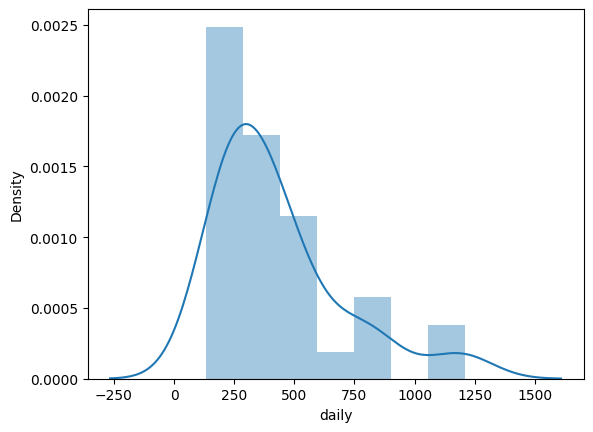

In [4]:
# import libraries
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
sns.distplot(data['daily'])

In [5]:
z=data.corr(numeric_only=True)
z

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [6]:
#

In [7]:
#

C:\Users\dheve\AppData\Local\Temp\ipykernel_19356\241806741.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['sunday'])


<Axes: xlabel='sunday', ylabel='Density'>

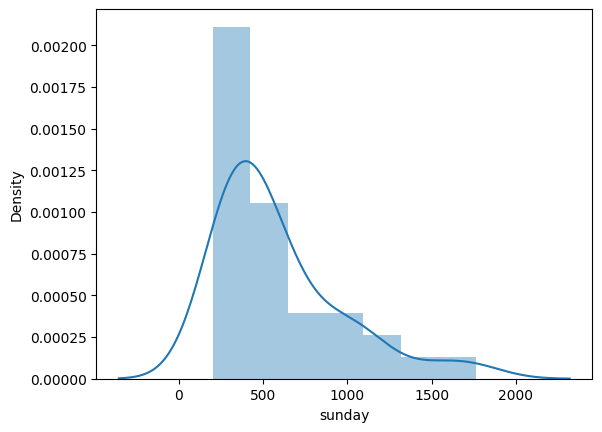

In [8]:
sns.distplot(data['sunday'])

In [9]:
model=smf.ols("sunday~daily",data=data).fit()
model.params
#y=mx+c,y=beta1 x and beta0

Intercept    13.835630
daily         1.339715
dtype: float64

In [10]:
# Hypothesis Testing
print(model.tvalues,'\n', model.pvalues)
#when p_value is less then alphs hypothsis is rejected
#otherwize null_hypothsis is accepted
#estimator is confedent intreval basically prapotion of success rate 

Intercept     0.386427
daily        18.934840
dtype: float64 
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


hypothesis test values

<Axes: xlabel='daily', ylabel='sunday'>

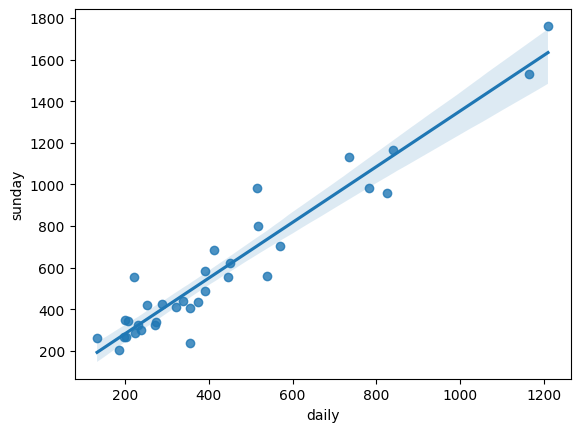

In [11]:
# Visualization of Correlation beteen x and y
sns.regplot(x=data['daily'],y=data['sunday'])  # regplot = regression plot


In [12]:
model.rsquared

0.9180596895873295

In [13]:
# null Hypothesis: Sunday News paper edition is in- dependent on Daily Edition
# Alternative Hypothesis:Sunday News paper edition is dependent on Daily Edition
# Intercept value which is p value is less than 0.05 ,reject nULL hYPOTHESIS
#INFER REJECT NULL HYPOTHESIS
#----------------------------------------------------------------------------------------------------------------------------------------------------
#hypothsis testing:
#sample data is used to infer the population for that we do some testing called hypothsis testing 
#test like t,z,f,p test
#null-hypothsis we assume the coin is fair(true assumption)
#alternate-hypothsis coin is not fair
#experiment to test null hypothsis should accepted or rejected
#cofindent intreval(is null hypothisi) 
#otherwise sigificant value 
#p-value mean out of 100 touch 1 touch in that particular rigion
#uncertanity mean the data is 10%(or any value) not fitting with other data specified as p-value
#siginficant level(alpha)(threshold fixed generally 5% of data ) mean 5% misclassification is allowed
#if p-value less than significant level then hypothsis is rejected otherwize accepted
#t-statictics is used to check hypothsis(that compairs the mean of two smaple to determine is there in significant difference between them)
#or we can use z-test for finding hypothsis

In [14]:
from scipy import stats
import numpy as np
arr=np.array([11,22,33,44,55,66])#for multyple dataset we use anova
mu=70#population mean
p_value,t_value=stats.ttest_1samp(arr,mu)#for one sample
#In the context of hypothesis testing with the t-test, you are testing whether the mean of the given array (sample) is significantly different from the population mean (which is mu = 70 in your case).
#Null Hypothesis (H₀): The mean of the sample is equal to the population mean, i.e., 
#altranate hypothsis is the mean of a sample is not equal to population mean

In [15]:
p_value

-3.7493801140547784

In [16]:
t_value#t=(sample_mean - poulation_mean)/population(standerd deviation)--------population_standard_diviation=sample_standerd_deviation/sqrt(N)(sample)

0.013302219172898637

In [17]:
alpha=0.05
if(p_value<alpha):
    print("reject null hypothsis")
else:
    print("accept null hypothsis")

reject null hypothsis


In [18]:
#t_test for 2 smaple
import numpy as np
a=np.array([12,3,12,44,55,66])
b=np.array([32,12,55,23,66,12])
from scipy import stats
t_statictics,p_val=stats.ttest_ind (a,b,equal_var=True)

In [19]:
t_statictics

-0.09408249476966778

In [20]:
p_val

0.9269020344861234

In [21]:
#first we find
# 1.no of sample observation
# 2.mean
# 3.std
# 4.t-value=(mean(sample)-mean(population))/std(population)/sqrt(n)---std(population)=((xi-mean(population))/no of population observation)--(to compaire the mean of two group or population and sample wether to check they belong to each other or not,if less then critical level they belong to each other)
# 5.t-critical(an border where we accept or reject the data)=stats.t.ppf(1-alfa/2,n-1)
# 6.MOE(margine of error)(basically border between accepted data or rejected data)=t-critical*std/sqrt(n) (everything from sample)
# 7.confident_intreval(mean-MOE,mean+MOE)#this sample give intreval which will define population range
#p-value:an strong evidence to be against the null hypothsis